In [ ]:
import os
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy import stats
from scipy.stats import zscore
from math import radians, cos, sin, asin, sqrt
import pydot
import seaborn as sns
import keras
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras import datasets, layers, models
import os, shutil
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
!pip install category_encoders
import category_encoders as ce
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

     |████████████████████████████████| 86 kB 4.4 MB/s 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# load in data 
url = 'https://raw.githubusercontent.com/rindalafayyad17/263-Project/main/diabetes_012_health_indicators_BRFSS2015.csv'
diabetes = pd.read_csv(url)

In [ ]:
diabetes.shape

(253680, 22)

In [ ]:
pd.crosstab(diabetes.Income, diabetes.Diabetes_012,margins=False)
print(diabetes['Income'].value_counts())

8.0    90385
7.0    43219
6.0    36470
5.0    25883
4.0    20135
3.0    15994
2.0    11783
1.0     9811
Name: Income, dtype: int64


In [ ]:
diabetes.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
# one hot encoder from sklearn was problematic in ordering
# income
one_hot = pd.get_dummies(diabetes['Income'])
one_hot.rename(columns = {1.0 : 'income1',
                          2.0 : 'income2',
                          3.0 : 'income3',
                          4.0 : 'income4',
                          5.0 : 'income5',
                          6.0 : 'income6',
                          7.0 : 'income7',
                          8.0 : 'income8'}, inplace = True)
                          
diabetes_final = pd.concat([diabetes,one_hot], axis = 1)

# education
one_hot = pd.get_dummies(diabetes['Education'])
one_hot.rename(columns = {1.0 : 'education1',
                          2.0 : 'education2',
                          3.0 : 'education3',
                          4.0 : 'education4',
                          5.0 : 'education5',
                          6.0 : 'education6'},
                          inplace = True)
                          
diabetes_final = pd.concat([diabetes_final,one_hot], axis = 1)

# age
one_hot = pd.get_dummies(diabetes['Age'])
one_hot.rename(columns = {1.0 : 'age1',
                          2.0 : 'age2',
                          3.0 : 'age3',
                          4.0 : 'age4',
                          5.0 : 'age5',
                          6.0 : 'age6',
                          7.0 : 'age7',
                          8.0 : 'age8', 
                          9.0 : 'age9',
                          10.0 : 'age10',
                          11.0 : 'age11',
                          12.0 : 'age12',
                          13.0 : 'age13'}, inplace = True)

diabetes_final = pd.concat([diabetes_final,one_hot], axis = 1)

# drop vars
diabetes_final.drop(['Income', 'Age', 'Education'], axis = 1)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,age4,age5,age6,age7,age8,age9,age10,age11,age12,age13
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0,0,0,1,0,0,0,0,0,0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,1,0,0,0,0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,1,0,0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,0,1,0,0,0,0,0,0,0,0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
# check the counts for 0 no diabetes, 1 prediabetic, 2 diabetic
diabetes['Diabetes_012'].value_counts()

0.0    213703
2.0     35346
1.0      4631
Name: Diabetes_012, dtype: int64

In [ ]:
# merge the prediabetic and not diabetic  
diabetes.loc[diabetes['Diabetes_012'] == 0.0, "Diabetes_012"] = 1



In [ ]:
# check the counts for 0 no diabetes, 1 diabetic
diabetes['Diabetes_012'].value_counts()

1.0    218334
2.0     35346
Name: Diabetes_012, dtype: int64

In [ ]:
print(diabetes['Age'].value_counts())


9.0     33244
10.0    32194
8.0     30832
7.0     26314
11.0    23533
6.0     19819
13.0    17363
5.0     16157
12.0    15980
4.0     13823
3.0     11123
2.0      7598
1.0      5700
Name: Age, dtype: int64


In [ ]:
# need to make training, validation and test split
features = diabetes_final.drop(['Diabetes_012', 'Income', 'Education', 'Age'], axis = 1)
print(features.head())


   HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0     1.0       1.0        1.0  40.0     1.0     0.0                   0.0   
1     0.0       0.0        0.0  25.0     1.0     0.0                   0.0   
2     1.0       1.0        1.0  28.0     0.0     0.0                   0.0   
3     1.0       0.0        1.0  27.0     0.0     0.0                   0.0   
4     1.0       1.0        1.0  24.0     0.0     0.0                   0.0   

   PhysActivity  Fruits  Veggies  ...  age4  age5  age6  age7  age8  age9  \
0           0.0     0.0      1.0  ...     0     0     0     0     0     1   
1           1.0     0.0      0.0  ...     0     0     0     1     0     0   
2           0.0     1.0      0.0  ...     0     0     0     0     0     1   
3           1.0     1.0      1.0  ...     0     0     0     0     0     0   
4           1.0     1.0      1.0  ...     0     0     0     0     0     0   

   age10  age11  age12  age13  
0      0      0      0      0  
1   

In [ ]:
print(diabetes['Age'].value_counts())


9.0     33244
10.0    32194
8.0     30832
7.0     26314
11.0    23533
6.0     19819
13.0    17363
5.0     16157
12.0    15980
4.0     13823
3.0     11123
2.0      7598
1.0      5700
Name: Age, dtype: int64


In [ ]:
# reshape labels and encode them
ce_OHE = ce.OneHotEncoder(cols=['Diabetes_012'])
labels = ce_OHE.fit_transform(diabetes)
labels = labels.iloc[:,0:2]


In [ ]:
print(diabetes['Age'].value_counts())


9.0     33244
10.0    32194
8.0     30832
7.0     26314
11.0    23533
6.0     19819
13.0    17363
5.0     16157
12.0    15980
4.0     13823
3.0     11123
2.0      7598
1.0      5700
Name: Age, dtype: int64


In [ ]:
# split into training and testing set 
X_train, X_test, y_train, y_test = train_test_split(features, labels,
    test_size=0.2, shuffle = True, random_state = 356)

# Use the same function above to spliut the training into train and validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
    test_size=0.25, random_state= 356) # 0.25 x 0.8 = 0.2

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape)

(152208, 45) (50736, 45) (50736, 45)


In [ ]:
# build and compile model 
# Define model -- should change model name
model = keras.Sequential([
  layers.Dense(256, activation='relu', input_dim = 45),
  layers.Dropout(0.5),

  layers.Dense(128, activation='sigmoid'), 
  layers.Dropout(0.5),

  layers.Dense(32, activation='sigmoid'), 

  layers.Dense(2, activation='sigmoid') # 2 categories
])

# model compile function
model.compile(loss = 'binary_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(),
              metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train, 
          y_train, 
          epochs = 30, #change epochs to 100 after testing
          batch_size = 200,
          validation_data=(X_val, y_val)
          )

Epoch 1/30
762/762 [==============================] - 6s 8ms/step - loss: 0.3244 - accuracy: 0.8629 - val_loss: 0.3215 - val_accuracy: 0.8670
Epoch 2/30
762/762 [==============================] - 5s 6ms/step - loss: 0.3242 - accuracy: 0.8631 - val_loss: 0.3197 - val_accuracy: 0.8636
Epoch 3/30
762/762 [==============================] - 5s 6ms/step - loss: 0.3242 - accuracy: 0.8626 - val_loss: 0.3222 - val_accuracy: 0.8667
Epoch 4/30
762/762 [==============================] - 5s 6ms/step - loss: 0.3248 - accuracy: 0.8623 - val_loss: 0.3215 - val_accuracy: 0.8618
Epoch 5/30
762/762 [==============================] - 5s 7ms/step - loss: 0.3252 - accuracy: 0.8633 - val_loss: 0.3215 - val_accuracy: 0.8664
Epoch 6/30
762/762 [==============================] - 5s 6ms/step - loss: 0.3262 - accuracy: 0.8628 - val_loss: 0.3209 - val_accuracy: 0.8656
Epoch 7/30
762/762 [==============================] - 6s 7ms/step - loss: 0.3263 - accuracy: 0.8628 - val_loss: 0.3222 - val_accuracy: 0.8658
Epoch 

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
model.save('/MyDrive/diabetes2.h5')


In [ ]:
# load model
new_model = tf.keras.models.load_model('/MyDrive/diabetes2.h5')





In [ ]:
# Show the model architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               11776     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 2)                 66        
                                                                 
Total params: 48,866
Trainable params: 48,866
Non-traina

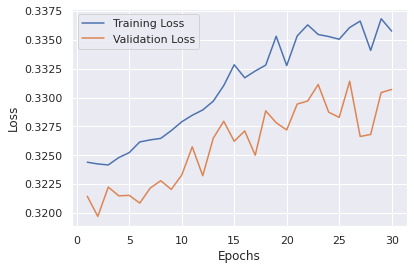

In [ ]:
# plot of validation loss and train loss
import seaborn as sns
sns.set()

train_acc  = history.history['accuracy']
train_loss = history.history['loss']
val_acc  = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_loss, label = 'Training Loss')
plt.plot(epochs, val_loss, label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
# test set accuracy 
test_loss, test_acc = new_model.evaluate(X_test, y_test)
print("The test set accuracy is: ", test_acc)

1586/1586 [==============================] - 2s 1ms/step - loss: 0.3305 - accuracy: 0.8647
The test set accuracy is:  0.8647311329841614


In [ ]:
# predictions on test set held out
y_proba = new_model.predict(X_test)
# make values predicted binary and not vector of probs
y_pred = y_proba.argmax(axis = 1) # want 0,1 vector
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# need to y_test to be single vector of 0,1 again
y_test_lab = diabetes.iloc[y_test.index, :]["Diabetes_012"] # must check if this actually works as desired
y_test_lab # need to change these so 2 and 1 make sense, 2 is diabetic, 0 is prediabetic
y_test_lab[y_test_lab == 1] = 0
y_test_lab[y_test_lab == 2] = 1

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()


Confusion Matrix

[[42769   870]
 [ 5993  1104]]

Accuracy: 0.865



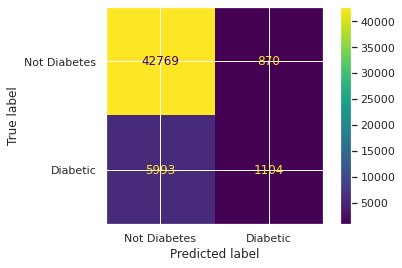

In [ ]:
# create accuracy table 
#importing confusion matrix
confusion = confusion_matrix(y_test_lab, y_pred)
print('Confusion Matrix\n')
print(confusion)
cmd = ConfusionMatrixDisplay(confusion, display_labels=['Not Diabetes','Diabetic'])
cmd.plot()

#importing accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.3f}\n'.format(accuracy_score(y_test_lab, y_pred)))



##Subset Data by Income, Education, Gender, Age

### I.Income

When we subset by income we split into those under and over $35,000. However, a majority of the survey respondents reported lower than $10,000 income. 










In [ ]:
# 8 is above $75,000, 5 is below 35,000
 # maybe start with split of below 5 and above 5 
diabetes['Income'].value_counts()

8.0    90385
7.0    43219
6.0    36470
5.0    25883
4.0    20135
3.0    15994
2.0    11783
1.0     9811
Name: Income, dtype: int64

**Note: we are not going to refit the models to the training data but instead want to observe how well it fits to the testing dataset.**

In [ ]:
# function to subset which incomes you want
X_test.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,age4,age5,age6,age7,age8,age9,age10,age11,age12,age13
193256,0.0,0.0,1.0,23.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0,0,0,0,0,1,0,0,0,0
52416,0.0,0.0,1.0,29.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0,1,0,0,0,0,0,0,0,0
125094,1.0,1.0,1.0,27.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0,0,0,1,0,0,0,0,0,0
74892,0.0,0.0,1.0,35.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1357,0.0,1.0,1.0,19.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
def subset_income(test_features,test_target, split):
  # pretty sure i coudl have done minus indx below and been shorter, oh well
  # X test of only > 5 income 
  if split == 5: 

    # X test of only <= 5 income 
    features_high = test_features[(test_features["income6"] == 1.0) | (test_features["income7"] == 1.0) | (test_features["income8"] == 1.0)]
    high_indx = features_high.index
    features_low = test_features[~test_features.index.isin(high_indx)]

    # y test of only same subsets above
    y_test_high = test_target[y_test.index.isin(high_indx)]
    y_test_low = test_target[~y_test.index.isin(high_indx)]

  elif split == 6: 
    # X test of only <= 6 income 
    features_high = test_features[(test_features["income7"] == 1.0) | (test_features["income8"] == 1.0)]
    high_indx = features_high.index
    features_low = test_features[~test_features.index.isin(high_indx)]

    # y test of only same subsets above
    y_test_high = test_target[test_target.index.isin(high_indx)]
    y_test_low = test_target[~test_target.index.isin(high_indx)]

  return(features_high, features_low, y_test_high, y_test_low)


In [ ]:
features_high,features_low, y_test_high, y_test_low = subset_income(X_test,y_test,5)

# check sizes of datasets, why are these os small
print(features_high.shape,features_low.shape,y_test_high.shape, y_test_low.shape)

(33831, 45) (16905, 45) (33831, 2) (16905, 2)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()


0.0    30278
1.0     3553
Name: Diabetes_012, dtype: int64
Confusion Matrix

[[30111   167]
 [ 3279   274]]

Accuracy: 0.898



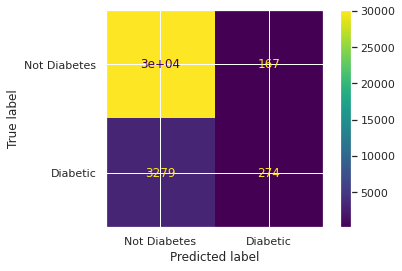

In [ ]:
# predict probabilities for high income
y_proba_high = new_model.predict(features_high)
y_pred_high = y_proba_high.argmax(axis = 1) # want 0,1 vector




y_test_lab_high = diabetes.iloc[y_test_high.index, :]['Diabetes_012']
y_test_lab_high # need to change labels to be 0,1 instead of 1,2 currently
y_test_lab_high[y_test_lab_high == 1] = 0
y_test_lab_high[y_test_lab_high == 2] = 1
print(y_test_lab_high.value_counts())


# create accuracy table 
#importing confusion matrix
confusion = confusion_matrix(y_test_lab_high, y_pred_high)
print('Confusion Matrix\n')
print(confusion)

cmd = ConfusionMatrixDisplay(confusion, display_labels=['Not Diabetes','Diabetic'])
cmd.plot()


#importing accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.3f}\n'.format(accuracy_score(y_test_lab_high, y_pred_high)))


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()


Confusion Matrix

[[12658   703]
 [ 2714   830]]

Accuracy: 0.798



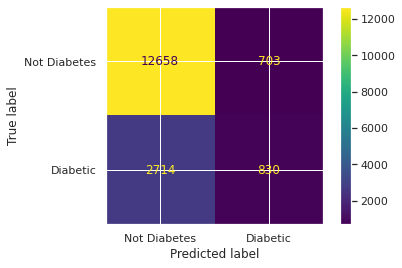

In [ ]:
# predict probabilities for low income
y_proba_low = new_model.predict(features_low)
y_pred_low = y_proba_low.argmax(axis = 1) # want 0,1,2 vector

y_test_lab_low = diabetes.iloc[y_test_low.index, :]['Diabetes_012']
y_test_lab_low # need to change labels to be 0,1 instead of 1,2 currently
y_test_lab_low[y_test_lab_low == 1] = 0
y_test_lab_low[y_test_lab_low == 2] = 1


# create accuracy table 
#importing confusion matrix
confusion = confusion_matrix(y_test_lab_low, y_pred_low)
print('Confusion Matrix\n')
print(confusion)

cmd = ConfusionMatrixDisplay(confusion, display_labels=['Not Diabetes','Diabetic'])
cmd.plot()

#importing accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.3f}\n'.format(accuracy_score(y_test_lab_low, y_pred_low)))

##2. Education

In [ ]:
# 4 is education of high school grad, so split at 4
print(diabetes['Education'].value_counts())

# X test of only <= 4 education 
features_high_edu = X_test[(X_test["education5"] == 1.0) | (X_test["education6"] == 1.0)]
high_edu_indx = features_high_edu.index
features_low_edu = X_test[~X_test.index.isin(high_edu_indx)]


# y test of only same subsets above
y_test_high = y_test[y_test.index.isin(high_edu_indx)]
y_test_low = y_test[~y_test.index.isin(high_edu_indx)]

print(features_high_edu.shape, y_test_high.shape, features_low_edu.shape, y_test_low.shape)


6.0    107325
5.0     69910
4.0     62750
3.0      9478
2.0      4043
1.0       174
Name: Education, dtype: int64
(35466, 45) (35466, 2) (15270, 45) (15270, 2)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()


0.0    31361
1.0     4105
Name: Diabetes_012, dtype: int64
Confusion Matrix

[[30953   408]
 [ 3595   510]]

Accuracy: 0.887



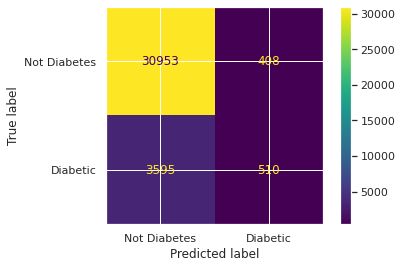

In [ ]:
# predict probabilities for high education
y_proba_high = new_model.predict(features_high_edu)
y_pred_high = y_proba_high.argmax(axis = 1) # want 0,1 vector
y_pred_high.shape

y_test_lab_high = diabetes.iloc[y_test_high.index, :]['Diabetes_012']
y_test_lab_high # need to change labels to be 0,1 instead of 1,2 currently
y_test_lab_high[y_test_lab_high == 1] = 0
y_test_lab_high[y_test_lab_high == 2] = 1
print(y_test_lab_high.value_counts())


# create accuracy table 
#importing confusion matrix
confusion = confusion_matrix(y_test_lab_high, y_pred_high)
print('Confusion Matrix\n')
print(confusion)

cmd = ConfusionMatrixDisplay(confusion, display_labels=['Not Diabetes','Diabetic'])
cmd.plot()


#importing accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.3f}\n'.format(accuracy_score(y_test_lab_high, y_pred_high)))


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()


0.0    12278
1.0     2992
Name: Diabetes_012, dtype: int64
Confusion Matrix

[[11816   462]
 [ 2398   594]]

Accuracy: 0.813



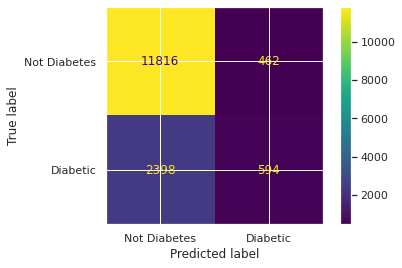

In [ ]:
# predict probabilities for high education
y_proba_low = new_model.predict(features_low_edu)
y_pred_low = y_proba_low.argmax(axis = 1) # want 0,1 vector

y_test_lab_low = diabetes.iloc[y_test_low.index, :]['Diabetes_012']
y_test_lab_low # need to change labels to be 0,1 instead of 1,2 currently
y_test_lab_low[y_test_lab_low == 1] = 0
y_test_lab_low[y_test_lab_low == 2] = 1
print(y_test_lab_low.value_counts())


# create accuracy table 
#importing confusion matrix
confusion = confusion_matrix(y_test_lab_low, y_pred_low)
print('Confusion Matrix\n')
print(confusion)

cmd = ConfusionMatrixDisplay(confusion, display_labels=['Not Diabetes','Diabetic'])
cmd.plot()


#importing accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.3f}\n'.format(accuracy_score(y_test_lab_low, y_pred_low)))

## 3. Age

In [ ]:
# split into binary above 8 and below 8 where 8 is 55 to 59 years old
print(diabetes['Age'].value_counts())

# X test of only <= 4 education 
features_old = X_test[(X_test["age9"] == 1.0) | (X_test["age10"] == 1.0)| (X_test["age11"] == 1.0)| (X_test["age12"] == 1.0)| (X_test["age13"] == 1.0)]
old_index = features_old.index
features_young = X_test[~X_test.index.isin(old_index)]


# y test of only same subsets above
y_test_old = y_test[y_test.index.isin(old_index)]
y_test_young = y_test[~y_test.index.isin(old_index)]

print(features_old.shape, y_test_old.shape, features_young.shape, y_test_young.shape)


9.0     33244
10.0    32194
8.0     30832
7.0     26314
11.0    23533
6.0     19819
13.0    17363
5.0     16157
12.0    15980
4.0     13823
3.0     11123
2.0      7598
1.0      5700
Name: Age, dtype: int64
(24579, 45) (24579, 2) (26157, 45) (26157, 2)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()


0.0    19726
1.0     4853
Name: Diabetes_012, dtype: int64
Confusion Matrix

[[19040   686]
 [ 3968   885]]

Accuracy: 0.811



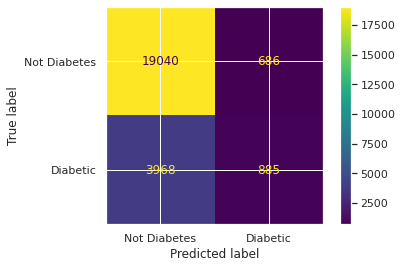

In [ ]:
# predict probabilities for older
y_proba_old = new_model.predict(features_old)
y_pred_old = y_proba_old.argmax(axis = 1) # want 0,1 vector
y_pred_old.shape

y_test_lab_old = diabetes.iloc[y_test_old.index, :]['Diabetes_012']
y_test_lab_old # need to change labels to be 0,1 instead of 1,2 currently
y_test_lab_old[y_test_lab_old == 1] = 0
y_test_lab_old[y_test_lab_old == 2] = 1
print(y_test_lab_old.value_counts())


# create accuracy table 
#importing confusion matrix
confusion = confusion_matrix(y_test_lab_old, y_pred_old)
print('Confusion Matrix\n')
print(confusion)

cmd = ConfusionMatrixDisplay(confusion, display_labels=['Not Diabetes','Diabetic'])
cmd.plot()


#importing accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.3f}\n'.format(accuracy_score(y_test_lab_old, y_pred_old)))


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()


0.0    23913
1.0     2244
Name: Diabetes_012, dtype: int64
Confusion Matrix

[[23729   184]
 [ 2025   219]]

Accuracy: 0.916



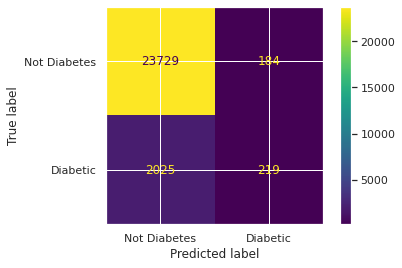

In [ ]:
# predict probabilities for younger
y_proba_young = new_model.predict(features_young)
y_pred_young = y_proba_young.argmax(axis = 1) # want 0,1 vector
y_pred_young.shape

y_test_lab_young = diabetes.iloc[y_test_young.index, :]['Diabetes_012']
y_test_lab_young # need to change labels to be 0,1 instead of 1,2 currently
y_test_lab_young[y_test_lab_young == 1] = 0
y_test_lab_young[y_test_lab_young == 2] = 1
print(y_test_lab_young.value_counts())


# create accuracy table 
#importing confusion matrix
confusion = confusion_matrix(y_test_lab_young, y_pred_young)
print('Confusion Matrix\n')
print(confusion)

cmd = ConfusionMatrixDisplay(confusion, display_labels=['Not Diabetes','Diabetic'])
cmd.plot()


#importing accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.3f}\n'.format(accuracy_score(y_test_lab_young, y_pred_young)))

In [ ]:
## 4. Gender

# 0 female, 1 is male
print(diabetes['Sex'].value_counts())

# X test split
features_female = X_test[(X_test["Sex"] == 0.0)]
female_index = features_female.index
features_male = X_test[~X_test.index.isin(female_index)]


# y test of only same subsets above
y_test_female = y_test[y_test.index.isin(female_index)]
y_test_male = y_test[~y_test.index.isin(female_index)]

print(features_female.shape, y_test_female.shape, features_male.shape, y_test_male.shape)

0.0    141974
1.0    111706
Name: Sex, dtype: int64
(28463, 45) (28463, 2) (22273, 45) (22273, 2)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()


0.0    24784
1.0     3679
Name: Diabetes_012, dtype: int64
Confusion Matrix

[[24208   576]
 [ 3042   637]]

Accuracy: 0.873



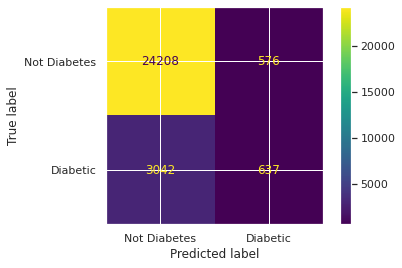

In [ ]:
# predict probabilities for female
y_proba_female = new_model.predict(features_female)
y_pred_female = y_proba_female.argmax(axis = 1) # want 0,1 vector
y_pred_female.shape

y_test_lab_female = diabetes.iloc[y_test_female.index, :]['Diabetes_012']
y_test_lab_female # need to change labels to be 0,1 instead of 1,2 currently
y_test_lab_female[y_test_lab_female == 1] = 0
y_test_lab_female[y_test_lab_female == 2] = 1
print(y_test_lab_female.value_counts())


# create accuracy table 
#importing confusion matrix
confusion = confusion_matrix(y_test_lab_female, y_pred_female)
print('Confusion Matrix\n')
print(confusion)

cmd = ConfusionMatrixDisplay(confusion, display_labels=['Not Diabetes','Diabetic'])
cmd.plot()


#importing accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.3f}\n'.format(accuracy_score(y_test_lab_female, y_pred_female)))


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()


0.0    18855
1.0     3418
Name: Diabetes_012, dtype: int64
Confusion Matrix

[[18561   294]
 [ 2951   467]]

Accuracy: 0.854



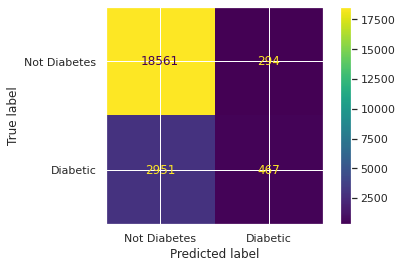

In [ ]:
# predict probabilities for male
y_proba_male = new_model.predict(features_male)
y_pred_male = y_proba_male.argmax(axis = 1) # want 0,1 vector
y_pred_male.shape

y_test_lab_male = diabetes.iloc[y_test_male.index, :]['Diabetes_012']
y_test_lab_male # need to change labels to be 0,1 instead of 1,2 currently
y_test_lab_male[y_test_lab_male == 1] = 0
y_test_lab_male[y_test_lab_male == 2] = 1
print(y_test_lab_male.value_counts())


# create accuracy table 
#importing confusion matrix
confusion = confusion_matrix(y_test_lab_male, y_pred_male)
print('Confusion Matrix\n')
print(confusion)

cmd = ConfusionMatrixDisplay(confusion, display_labels=['Not Diabetes','Diabetic'])
cmd.plot()


#importing accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.3f}\n'.format(accuracy_score(y_test_lab_male, y_pred_male)))

In [ ]:
## LIME? 